In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# Carregar dataset (ajuste o nome do arquivo se necessário)
df = pd.read_csv("data/btc_limpo.csv")  

# Converter datas e definir como índice
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Conferir primeiras linhas
print(df.head())


                   Close         Hight          Low          Open       Volume
Date                                                                          
2020-06-01  10167.268555  10199.565430  9450.899414   9463.605469  35198901068
2020-06-02   9529.803711  10182.340820  9460.571289  10162.973633  39137252109
2020-06-03   9656.717773   9682.859375  9471.846680   9533.760742  25007459262
2020-06-04   9800.636719   9887.610352  9525.247070   9655.854492  25921805072
2020-06-05   9665.533203   9869.237305  9663.216797   9800.215820  23509628646


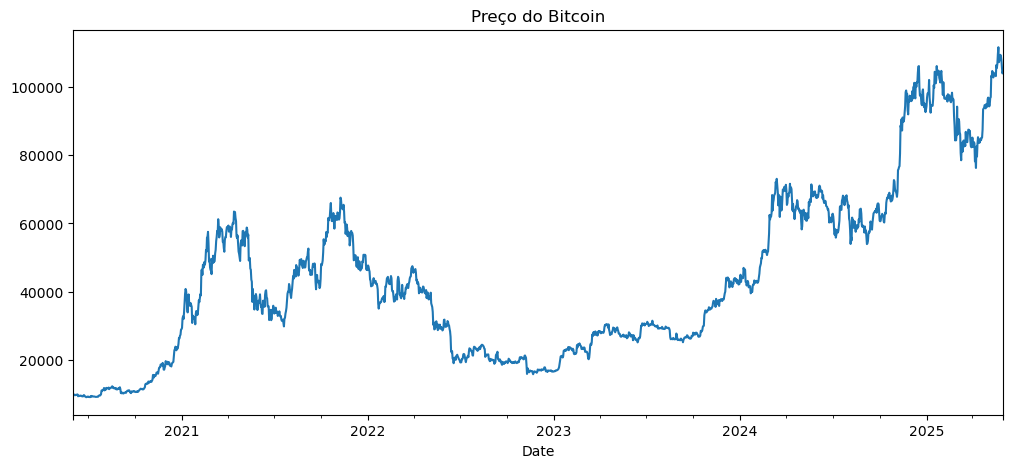

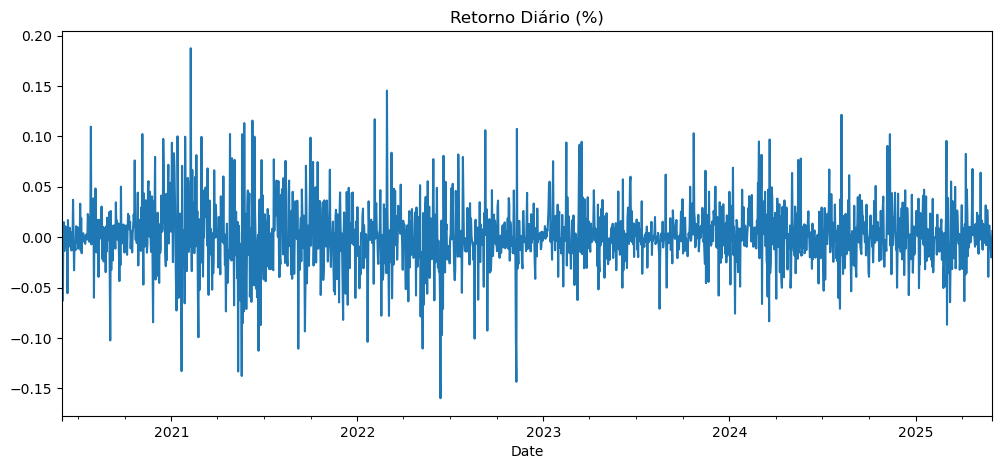

In [4]:
# Preço original
df['Close'].plot(figsize=(12,5), title="Preço do Bitcoin")
plt.show()

# Retornos (% variação diária)
df['Return'] = df['Close'].pct_change()
df['Return'].plot(figsize=(12,5), title="Retorno Diário (%)")
plt.show()


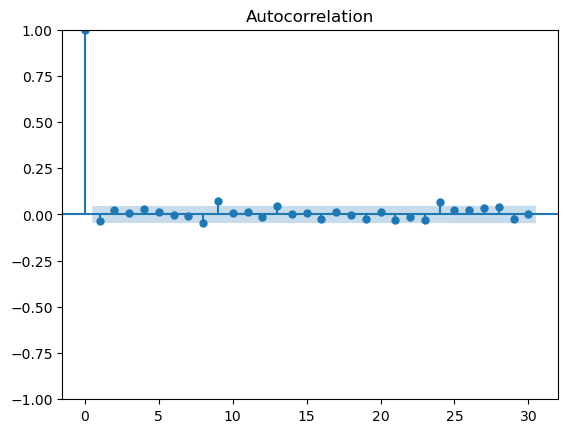

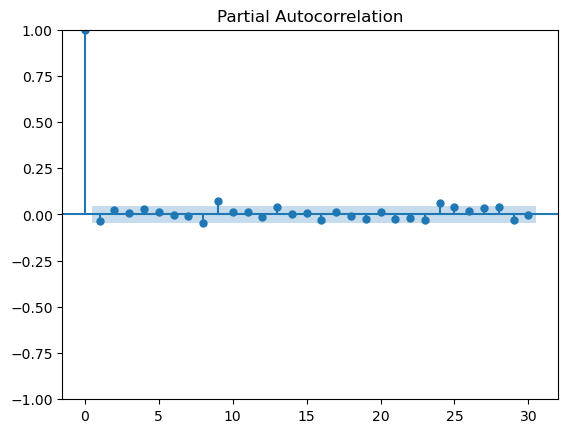

In [5]:
plot_acf(df['Return'].dropna(), lags=30)
plt.show()

plot_pacf(df['Return'].dropna(), lags=30)
plt.show()


In [6]:
# Últimos 30 dias como teste
train = df.iloc[:-30]
test = df.iloc[-30:]


In [7]:
y_pred_naive = [train['Close'].iloc[-1]] * len(test)

mae_naive = mean_absolute_error(test['Close'], y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(test['Close'], y_pred_naive))

print("Naive → MAE:", mae_naive, "RMSE:", rmse_naive)


Naive → MAE: 7691.996875 RMSE: 8696.4143568145


In [8]:
y_pred_snaive = df['Close'].shift(7).iloc[-30:]

mae_snaive = mean_absolute_error(test['Close'], y_pred_snaive)
rmse_snaive = np.sqrt(mean_squared_error(test['Close'], y_pred_snaive))

print("S-Naive(7) → MAE:", mae_snaive, "RMSE:", rmse_snaive)


S-Naive(7) → MAE: 3954.55625 RMSE: 4776.120570084441


In [9]:
model = ARIMA(train['Close'], order=(1,1,1))
fit = model.fit()

forecast = fit.forecast(steps=30)

mae_arima = mean_absolute_error(test['Close'], forecast)
rmse_arima = np.sqrt(mean_squared_error(test['Close'], forecast))

print("ARIMA(1,1,1) → MAE:", mae_arima, "RMSE:", rmse_arima)


ARIMA(1,1,1) → MAE: 7782.7471483576865 RMSE: 8791.787324345021


C:\Users\guiga\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\guiga\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\guiga\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


         Modelo          MAE         RMSE
0         Naive  7691.996875  8696.414357
1    S-Naive(7)  3954.556250  4776.120570
2  ARIMA(1,1,1)  7782.747148  8791.787324


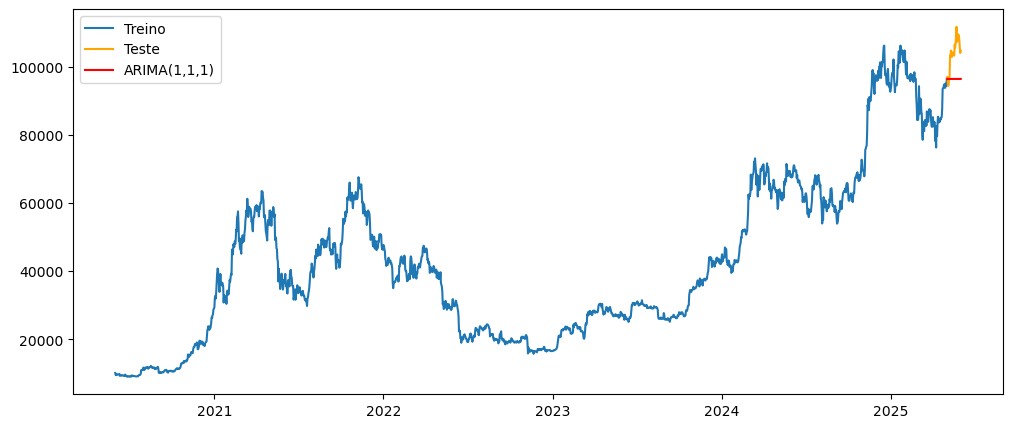

In [10]:
# Comparação em tabela
results = pd.DataFrame({
    "Modelo": ["Naive", "S-Naive(7)", "ARIMA(1,1,1)"],
    "MAE": [mae_naive, mae_snaive, mae_arima],
    "RMSE": [rmse_naive, rmse_snaive, rmse_arima]
})
print(results)

# Visualização
plt.figure(figsize=(12,5))
plt.plot(train['Close'], label="Treino")
plt.plot(test['Close'], label="Teste", color="orange")
plt.plot(forecast, label="ARIMA(1,1,1)", color="red")
plt.legend()
plt.show()
